<a href="https://colab.research.google.com/github/tiwars10/Analytics/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())
 
 
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

3.6.8
tensorflow: 1.14.0
keras: 2.2.5


Using TensorFlow backend.


**Importing all Required Libraries**

In [0]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, LSTM, Dropout, advanced_activations
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
import pandas_profiling

In [0]:
import io
from io import StringIO
import string
import pandas as pd
from pandas.compat import StringIO
from collections import Counter

**To run multiple statement at once**

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Importing the MNIST Data**
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems

In [0]:
from google.colab import files
uploaded = files.upload()

Saving mnist_test.csv to mnist_test (1).csv


In [0]:

df = pd.read_csv(io.StringIO(uploaded['mnist_test.csv'].decode('utf-8')))

In [0]:
df.shape

(10000, 785)

**Investigate the Data**

In [0]:

 
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

7850000

(10000, 785)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
9999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [0]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [0]:
print ('Overall data summary')
df.describe()
df.shape
 


Overall data summary


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0038,0.0236,0.0158,0.040300,0.051100,0.104700,0.234300,...,2.634600,1.410300,0.895600,0.551000,0.289100,0.115100,0.05000,0.002700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002200,0.043500,0.088800,0.133200,0.160000,0.184300,0.3123,0.453400,0.558300,0.574600,0.458200,0.274100,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0,4.443400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3800,2.3600,1.5800,2.884113,2.699336,4.516213,6.495508,...,22.163799,16.149589,12.790765,10.191182,7.523203,4.333536,3.08954,0.225605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165523,2.719218,4.285178,4.989063,5.620156,5.372897,7.6112,9.274601,10.181816,10.410152,9.750024,7.050811,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0,2.895865
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

(10000, 785)

Since there are alot of observation around 10000, if we try to analyze the data using correlation graph, its bit difficult to get insights

In [0]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

In [0]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();

**Creating Labels and Features**; Other than the last colunm rest all colunms will be features

In [0]:


# Create Features and Labels and Standardize data
Y = df.iloc[:,784]
X= df.iloc[:,0:784]
std = StandardScaler()
X_Features= std.fit_transform(X)


**Splitting the data into Train data set and Test Data Set**, 75% of data is taken as training data set and 25% of data is taken as test data set

In [0]:
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(7500, 784)

(2500, 784)

(7500,)

(2500,)

numpy.ndarray

Visualise the train and test data

In [0]:
train_x, 
test_x, 
train_y, 
test_y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),)

(651     6
 6560    5
 8974    9
 2348    8
 5670    8
 7454    5
 3689    8
 305     2
 7671    0
 5844    9
 3858    3
 8990    2
 4736    6
 2377    0
 2764    6
 2813    6
 544     8
 2025    8
 9282    3
 3614    0
 1483    8
 6742    2
 8841    1
 6475    6
 9024    9
 4695    3
 8220    4
 4165    6
 6349    6
 9950    8
        ..
 1031    2
 6121    8
 6285    0
 1110    5
 1888    2
 9719    6
 753     2
 3049    2
 8151    4
 562     6
 6542    6
 8093    9
 4764    0
 3562    5
 8444    4
 2516    1
 2962    3
 5374    8
 5396    4
 9394    7
 3462    2
 7751    8
 4225    5
 144     5
 5056    5
 2895    6
 7813    2
 905     4
 5192    6
 235     1
 Name: label, Length: 7500, dtype: int64,)

9953    3
3850    6
4962    6
3886    3
5437    7
8517    7
2041    4
1989    1
1933    9
9984    2
8418    4
2418    2
6811    2
1217    4
6978    8
6111    2
7865    3
7781    2
7775    9
7039    4
7673    4
2907    4
1266    6
2370    2
3092    0
130     4
1988    3
7877    1
6450    1
6880    9
       ..
8088    8
8501    6
6385    7
5473    3
2019    0
3291    9
2975    1
665     4
2253    3
2149    8
5191    5
2912    4
803     5
5511    8
4581    5
9860    7
7730    8
7916    7
9384    7
7927    7
6321    8
7516    0
8895    2
8543    6
8472    4
6955    6
557     3
2455    5
3920    8
6405    3
Name: label, Length: 2500, dtype: int64

**Buidling Deep Learning  Model**


The model deatils

*  Input Layer: 1024 neurons,Relu as activation function
*  1st Hidden Layer: 100 neurons,tanh as activation function
*  2nd Hidden Layer: 150 neurons,Relu as activation function
*  3rd Hidden Layer: 100 neurons,tanh as activation function
*  4th Hidden Layer: 100 neurons,tanh as activation function
*  Output Layer : 10 neurons,Softmax as activation function

here ouput layer has only 10 neurons because , we 10 unique digits in the dataset 








In [0]:
np.ndarray
# Build Deep Learning Model
model = Sequential()
model.add(Dense(1024, input_dim =784))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('tanh'))
#model.add(Dropout(0.2))

model.add(Dense(150))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('tanh'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 


numpy.ndarray

W0906 08:40:20.560395 140411937470336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 08:40:20.614033 140411937470336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 08:40:20.625627 140411937470336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 08:40:20.685973 140411937470336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0906 08:40:20.697591 

In [0]:
train_x = np.array(train_x)
train_y = np.array(train_y)


**Fitting the built Deep Learning model to train dataset**

In [0]:
# Fit the model
model.fit(train_x,train_y, epochs=20, batch_size=64)

W0906 08:48:42.972109 140411937470336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
7500/7500 [==============================] - 6s 749us/step - loss: 0.5849 - acc: 0.8256
Epoch 2/20
7500/7500 [==============================] - 4s 523us/step - loss: 0.1787 - acc: 0.9485
Epoch 3/20
7500/7500 [==============================] - 4s 518us/step - loss: 0.0946 - acc: 0.9741
Epoch 4/20
7500/7500 [==============================] - 4s 514us/step - loss: 0.0530 - acc: 0.9853
Epoch 5/20
7500/7500 [==============================] - 4s 503us/step - loss: 0.0273 - acc: 0.9944
Epoch 6/20
7500/7500 [==============================] - 4s 505us/step - loss: 0.0171 - acc: 0.9969
Epoch 7/20
7500/7500 [==============================] - 4s 510us/step - loss: 0.0112 - acc: 0.9984
Epoch 8/20
7500/7500 [==============================] - 4s 517us/step - loss: 0.0080 - acc: 0.9992
Epoch 9/20
7500/7500 [==============================] - 4s 493us/step - loss: 0.0062 - acc: 0.9993
Epoch 10/20
7500/7500 [==============================] - 4s 508us/step - loss: 0.0052 - acc: 0.9995
Epoch 11/

**Implementing the model on Test data and evaluating the accuarcy of the model**

From the  below results , **the model is giving 95.20% of accuracy**.
Have locked the above mentione parameters for the model only after when we observed that the **accuracy of training datawas increasing and accuracy of test data was decreasing**.

In [0]:


# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2500/2500 [==============================] - 0s 143us/step

acc: 95.20%


In [0]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print()
print()
#auc = metrics.roc_auc_score(test_y,classes)
print ('AUC')
#print (auc)
print()
print()
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

2500
Positive Cases in Test Data: 274
Neagtive Cases in Test Data: 234


Accuracy Score
0.952


AUC


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       234
           1       0.99      0.99      0.99       274
           2       0.93      0.96      0.95       283
           3       0.95      0.93      0.94       257
           4       0.95      0.96      0.95       279
           5       0.93      0.92      0.93       221
           6       0.94      0.97      0.96       213
           7       0.95      0.94      0.95       283
           8       0.95      0.93      0.94       204
           9       0.94      0.93      0.94       252

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



From above results, this gives the precision , recall and f1 score for all the 10 digits.
Precision says How many 'X' digit were actually X among all 'X's predicted.
Recall says How many 'X' digits did the model recalled correctly.

**Now we will try to print a particular digit from the data set , by mentioning the required row number. Here we  printing the digit at 115th row.**

In [0]:
sample_row=115
sample_row=df.iloc[sample_row,:-1]
transfered_row=sample_row.values.reshape(28,28)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

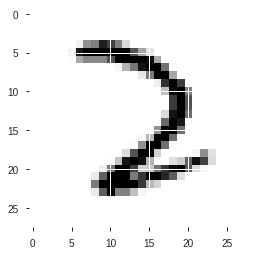

In [0]:
plt.imshow(transfered_row)
plt.show()

So the digit at the 115th row is number 2, this can be verified by looking the dataset.